<a href="https://colab.research.google.com/github/wbandabarragan/quantum-mechanics-1/blob/main/python-resources/python_for_QM06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 6: Python for Quantum Mechanics

## Finite square well potential:

In class, we studied the finite square well potential problem. When looking into the even solutions and applying boundary conditions, we found a transcendental equation for $z=la$:

$\tan(z) = \sqrt{\left(\frac{z_0}{z}\right)^2 - 1}$

where $a$ is the half-width of the potential $V(x)=-V_0$ between $x=-a$ and $x=+a$:

$z_0 = \frac{a}{\hbar}\sqrt{2\,m\,V_0}$,

andthe wavenumber inside the well is:

$l = \frac{\sqrt{2\,m(E+V_0)}}{\hbar}$


**Task: Solve the above transcendetal equation using python optimisation tools and display the results for several $z_0$.**

In [2]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt # Important library to solve our t. eq.

In [3]:
# Fix z_0
z0 = 8

# Vector for z
z = np.arange(0., 10*np.pi, 0.001)

$\tan(z) = \sqrt{\left(\frac{z_0}{z}\right)^2 - 1}$

In [5]:
# Tangent
y_lhs = np.tan(z)

# Sqrt
y_rhs = np.sqrt((z0**2/z**2) - 1.)

<ipython-input-5-215572e20728>:5: RuntimeWarning: divide by zero encountered in divide
  y_rhs = np.sqrt((z0**2/z**2) - 1.)
<ipython-input-5-215572e20728>:5: RuntimeWarning: invalid value encountered in sqrt
  y_rhs = np.sqrt((z0**2/z**2) - 1.)


In [9]:
# Remove the large values for the tangent

y_lhs[y_lhs > +4*z0] = np.nan
y_lhs[y_lhs < -4*z0] = np.nan

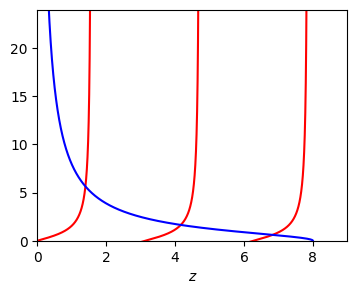

In [12]:
# Plotting

plt.figure(figsize= (4,3))

plt.plot(z, y_lhs, c= 'red')
plt.plot(z, y_rhs, c = 'blue')

plt.xlim(0, z0+1)
plt.ylim(0, 3*z0)

plt.xlabel(r"$z$")

plt.show()

### Solve the equation numerically:


$\frac{\tan(z)}{\sqrt{\left(\frac{z_0}{z}\right)^2 - 1}} - 1= 0$

In [14]:
# Objective function to be optimised

def obj_function(z, z0):
  """
  Objective function.
  """
  opt_func = np.tan(z)/(np.sqrt((z0/z)**2 - 1.)) - 1.

  return opt_func


In [16]:
# Find the z for which the LHS and RHS are the same

result = opt.root(obj_function, [1., 4., 7.], args = z0)

print(result.x)

[1.39546614 4.16483091 6.83067433]


In [17]:
# Tangent for each point

y0 = np.tan(result.x[0])
y1 = np.tan(result.x[1])
y2 = np.tan(result.x[2])

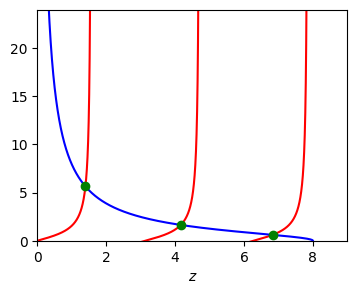

In [19]:
# Plotting

plt.figure(figsize= (4,3))

plt.plot(z, y_lhs, c= 'red')
plt.plot(z, y_rhs, c = 'blue')

plt.plot(result.x[0], y0, marker = "o", c = 'green')
plt.plot(result.x[1], y1, marker = "o", c = 'green')
plt.plot(result.x[2], y2, marker = "o", c = 'green')

plt.xlim(0, z0+1)
plt.ylim(0, 3*z0)

plt.xlabel(r"$z$")

plt.show()